#**Preparation**

###Install Miniconda3 and RDKit

In [1]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-03-21 18:13:09--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
    - conda==4.8.2=py37_0
    - cryptography==2.8=py37h1ba5d50_0
    - idna==2.8=py37_0
    - ld_impl_linux-64==2.33.1=h53a641e_7
    - libedit

###Install chembl_webresource_client

In [2]:
!pip install chembl_webresource_client

###Append rdkit path to current python system path

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit.Chem import PandasTools

###Import IPython helpers

In [4]:
%matplotlib inline
%pylab inline
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


###Import RDKit, Numpy, Pandas libraries

In [0]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit import DataStructs
import numpy as np
import pandas as pd
from time import time

###Install Open Babel

In [6]:
!sudo apt install openbabel pymol

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openbabel is already the newest version (2.3.2+dfsg-3build1).
pymol is already the newest version (1.8.4.0+dfsg-1build1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


###Authorization Google Colab

In [7]:
from google.colab import drive, files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**Simple RDKit stuff - Molecules, descriptors and similarity**

Ref: https://github.com/chembl/mychembl/blob/master/ipython_notebooks/

###Molecule from SMILES

**Canonical** SMILES -> Each distinct chemical molecule has a single UNIQUE SMILES representation

**Isomeric** SMILES -> Support the specification of isotopes, chirality, and configuration of double bonds 

In [0]:
smi = 'CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)c1cc(C)on1)C(C)C)C(=O)N[C@@H](C[C@@H]2CCNC2=O)\C=C/C(=O)OCc3ccccc3' #Isomeric SMILES (Simplified Molecular-input Line-Entry System) 
                                                                                                       #, PDB: 6LU7
mol = Chem.MolFromSmiles(smi)

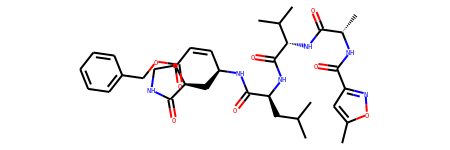

In [9]:
mol

###Simple descriptors

In [10]:
print(Descriptors.MolWt(mol))

680.8030000000002


In [11]:
print(Descriptors.RingCount(mol))

3


###Output to various text formats

In [12]:
Chem.MolToSmiles(mol, isomericSmiles=True) #Isomeric SMILES

'Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)C(=O)N[C@H](/C=C\\C(=O)OCc2ccccc2)C[C@@H]2CCNC2=O)C(C)C)no1'

In [13]:
Chem.MolToSmiles(mol, isomericSmiles=False) #Canonical SMILES

'Cc1cc(C(=O)NC(C)C(=O)NC(C(=O)NC(CC(C)C)C(=O)NC(C=CC(=O)OCc2ccccc2)CC2CCNC2=O)C(C)C)no1'

In [14]:
print(Chem.MolToInchi(mol))

InChI=1S/C35H48N6O8/c1-20(2)16-27(39-35(47)30(21(3)4)40-31(43)23(6)37-34(46)28-17-22(5)49-41-28)33(45)38-26(18-25-14-15-36-32(25)44)12-13-29(42)48-19-24-10-8-7-9-11-24/h7-13,17,20-21,23,25-27,30H,14-16,18-19H2,1-6H3,(H,36,44)(H,37,46)(H,38,45)(H,39,47)(H,40,43)/b13-12-/t23-,25-,26+,27-,30-/m0/s1


In [15]:
print(Chem.MolToSmarts(mol))

[#6]-[#6](-[#6])-[#6]-[#6@H](-[#7]-[#6](=[#8])-[#6@@H](-[#7]-[#6](=[#8])-[#6@H](-[#6])-[#7]-[#6](=[#8])-[#6]1:[#6]:[#6](-[#6]):[#8]:[#7]:1)-[#6](-[#6])-[#6])-[#6](=[#8])-[#7]-[#6@@H](-[#6]-[#6@@H]1-[#6]-[#6]-[#7]-[#6]-1=[#8])/[#6]=[#6]\[#6](=[#8])-[#8]-[#6]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1


In [0]:
sdf = Chem.MolToMolBlock(mol)

In [17]:
print(sdf)


     RDKit          2D

 49 51  0  0  0  0  0  0  0  0999 V2000
    9.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.2500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.5000   -5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0000   -5.1962    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2500   -3.8971    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0

###Fingerprints and similarity

In [0]:
fp = Chem.GetMorganFingerprintAsBitVect(mol,2,nBits=2048)

In [19]:
fp.ToBitString()

'010000000000000000000000000001010000000000000000000000000000000000000000000000001000000000000000000000000000000000000100000000000000000000000000000100000000000000000000000001000000000000000000000000000000100000000000000000000000000000000000000000001000000000000000000000000000000000010000000000000000000001000000001000000000000000000000000100000000010000000000000000000000000000100000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000100000000000000000000100000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000001000000000000000000001000001000000000000000000000001000000000000011000000000000000000000000000000100000000010001000010000000000000100000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000100000000000000000001000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000001000000000

In [20]:
fp.GetNumOnBits() # How many '1' in the string?

82

In [21]:
fp.GetNumBits() # Lenght of the string

2048

In [0]:
smi2 = 'CC(C)(C)OC(=O)Nc1cccn([C@@H](CC2CC2)C(=O)N[C@@H](C[C@@H]2CCNC2=O)[C@@H](O)C(=O)NCc2ccccc2)c1=O' #PDB:6Y2F
mol2 = Chem.MolFromSmiles(smi2)

In [0]:
fp2 = Chem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=2048)

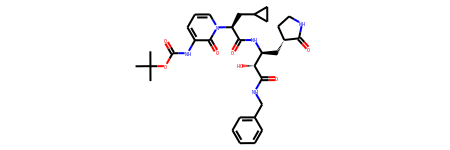

In [24]:
mol2

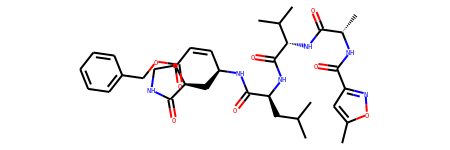

In [25]:
mol

In [26]:
DataStructs.TanimotoSimilarity(fp,fp2)

0.2809917355371901

Note: Tanimoto Similarity, 0 ≤ **J** ≤ 1

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7)


###Similarity Maps

(<Figure size 180x180 with 1 Axes>, 0.10537634408602153)

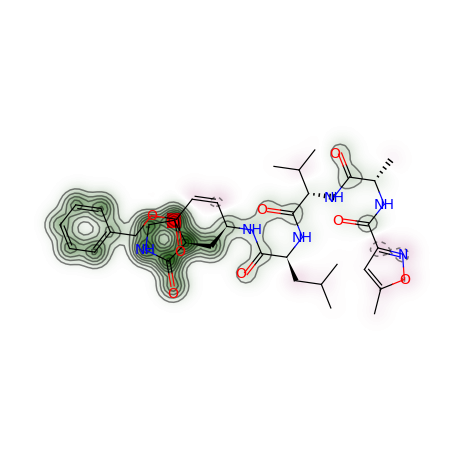

In [27]:
from rdkit.Chem.Draw import SimilarityMaps
SimilarityMaps.GetSimilarityMapForFingerprint(mol2, mol, SimilarityMaps.GetMorganFingerprint)

#**Using ChEMBL to find similarity**

Tutorial: https://github.com/chembl/chembl_webresource_client

###Find compounds similar to given SMILES query with similarity threshold of 40%

In [0]:
from chembl_webresource_client.new_client import *
similarity = new_client.similarity
res = similarity.filter(smiles="Cc1cc(C(=O)NC(C)C(=O)NC(C(=O)NC(CC(C)C)C(=O)NC(C=CC(=O)OCc2ccccc2)CC2CCNC2=O)C(C)C)no1", similarity=50) #PDB: 6LU7

In [0]:
df_res = pd.DataFrame(res)

In [30]:
df_res

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,helm_notation,indication_class,inorganic_flag,max_phase,molecule_chembl_id,molecule_hierarchy,molecule_properties,molecule_structures,molecule_type,natural_product,oral,parenteral,polymer_flag,pref_name,prodrug,similarity,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year
0,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL1230135,"{'molecule_chembl_id': 'CHEMBL1230135', 'paren...","{'alogp': '2.08', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'Cc1cc(C(=O)N[C@@H](C)C(=...,Small molecule,-1,False,False,False,None,-1,100,MOL,False,False,None,None,None,NaN,None,None,False,None,None
1,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL393608,"{'molecule_chembl_id': 'CHEMBL393608', 'parent...","{'alogp': '1.40', 'aromatic_rings': 1, 'cx_log...",{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...,Small molecule,-1,False,False,False,None,-1,77.906978130340576171875,MOL,False,False,None,None,None,NaN,None,None,False,None,None
2,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL238216,"{'molecule_chembl_id': 'CHEMBL238216', 'parent...","{'alogp': '1.60', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...,Small molecule,-1,False,False,False,None,-1,75.5555570125579833984375,MOL,False,False,None,None,None,NaN,None,None,False,None,None
3,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL213543,"{'molecule_chembl_id': 'CHEMBL213543', 'parent...","{'alogp': '2.60', 'aromatic_rings': 1, 'cx_log...",{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...,Small molecule,-1,False,False,False,None,-1,70.7865178585052490234375,MOL,False,False,None,None,None,NaN,None,None,False,None,None
4,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL3813895,"{'molecule_chembl_id': 'CHEMBL3813895', 'paren...","{'alogp': '4.01', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'Cc1cc(C(=O)N[C@H](C(=O)C...,Small molecule,-1,False,False,False,None,-1,68.68686676025390625,MOL,False,False,None,None,None,NaN,None,None,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL3814192,"{'molecule_chembl_id': 'CHEMBL3814192', 'paren...","{'alogp': '2.88', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'Cc1cc(C(=O)N[C@H](C(=O)C...,Small molecule,-1,False,False,False,None,-1,50.45871734619140625,MOL,False,False,None,None,None,NaN,None,None,False,None,None
60,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL4126005,"{'molecule_chembl_id': 'CHEMBL4126005', 'paren...","{'alogp': '3.97', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'CC(C)C[C@H](NC(=O)[C@H](...,Small molecule,-1,False,False,False,None,-1,50,MOL,False,False,None,None,None,NaN,None,None,False,None,None
61,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL141157,"{'molecule_chembl_id': 'CHEMBL141157', 'parent...","{'alogp': '1.09', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'C#CC[C@@H](C(=O)N[C@H](/...,Small molecule,-1,False,False,False,None,-1,50,MOL,False,False,None,None,None,NaN,None,None,False,None,None
62,[],-1,"{'biocomponents': [], 'description': None, 'he...",0,None,-1,[],False,None,-1,PEPTIDE1{[X2760].L.[X2314]}$$$$,None,-1,0,CHEMBL2441742,"{'molecule_chembl_id': 'CHEMBL2441742', 'paren...","{'alogp': '3.42', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'CC(C)C[C@H](NC(=O)[C@@H]...,Protein,-1,False,False,False,None,-1,50,BOTH,False,False,None,None,None,NaN,None,None,False,None,None


In [31]:
len(df_res)

64

### Compound data

In [0]:
compounds = new_client.molecule
cmpd_id_list = list(df_res['molecule_chembl_id'])
compound_list = compounds.filter(molecule_chembl_id__in = cmpd_id_list) \
                         .only('molecule_chembl_id','molecule_structures')

Change to DataFrame

In [33]:
compound_df = pd.DataFrame.from_records(compound_list)
compound_df = compound_df.drop_duplicates('molecule_chembl_id', keep = 'first')
print(compound_df.shape)

(64, 2)


In [34]:
compound_df

,molecule_chembl_id,molecule_structures
0,CHEMBL20260,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...
2,CHEMBL20636,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...
3,CHEMBL277716,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...
4,CHEMBL280938,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...
5,CHEMBL21082,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...
...,...,...
60,CHEMBL3814175,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...
61,CHEMBL3885455,{'canonical_smiles': 'Cc1cc(C(=O)N[C@@H](Cc2cc...
62,CHEMBL4095387,{'canonical_smiles': 'CCOC(=O)/C=C/C(C[C@@H]1C...
63,CHEMBL4126005,{'canonical_smiles': 'CC(C)C[C@H](NC(=O)[C@H](...


In [35]:
for i, cmpd in compound_df.iterrows():
    if compound_df.loc[i]['molecule_structures'] != None:
        compound_df.loc[i]['molecule_structures'] = cmpd['molecule_structures']['canonical_smiles']

print (compound_df.shape)

(64, 2)


In [36]:
compound_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL20260,CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@H...
2,CHEMBL20636,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
3,CHEMBL277716,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
4,CHEMBL280938,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
5,CHEMBL21082,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...


### Prepare output data

In [37]:
output_df = compound_df.rename(columns= {'molecule_structures':'smiles'})
output_df.shape
output_df.head()

(64, 2)

,molecule_chembl_id,smiles
0,CHEMBL20260,CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@H...
2,CHEMBL20636,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
3,CHEMBL277716,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
4,CHEMBL280938,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
5,CHEMBL21082,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...


In [0]:
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol='smiles')

,molecule_chembl_id,smiles,ROMol
0,CHEMBL20260,CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@H...,
2,CHEMBL20636,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,
3,CHEMBL277716,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,
4,CHEMBL280938,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,
5,CHEMBL21082,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,
...,...,...,...
60,CHEMBL3814175,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...,
61,CHEMBL3885455,Cc1cc(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](C=O)C...,
62,CHEMBL4095387,CCOC(=O)/C=C/C(C[C@@H]1CCNC1=O)NC(=O)[C@@H](CC...,
63,CHEMBL4126005,CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)...,

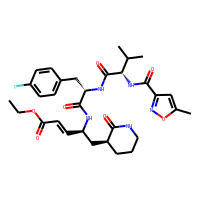
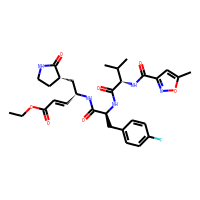
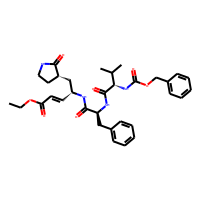
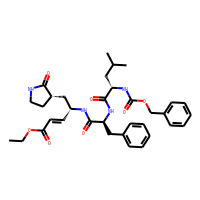
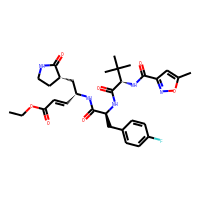
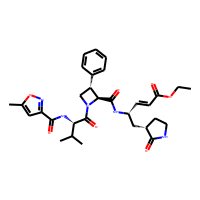
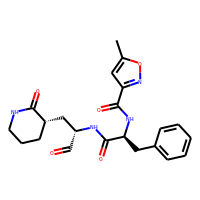
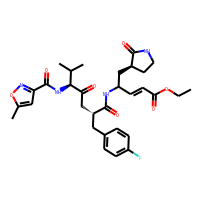
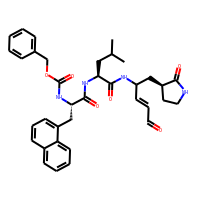
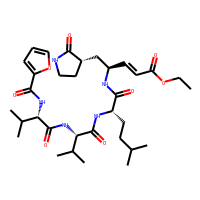

In [39]:
output_df

In [40]:
drive.mount('/content/gdrive/')
output_df.drop("ROMol", axis=1).to_csv('/content/gdrive/My Drive/Colab Notebooks/vittamin/cov_compounds.csv')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
smi = output_df.drop(output_df.columns[[0, 2]], axis=1)

In [42]:
smi

,smiles
0,CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@H...
2,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
3,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
4,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
5,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
...,...
60,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H...
61,Cc1cc(C(=O)N[C@@H](Cc2ccccc2)C(=O)N[C@H](C=O)C...
62,CCOC(=O)/C=C/C(C[C@@H]1CCNC1=O)NC(=O)[C@@H](CC...
63,CC(C)C[C@H](NC(=O)[C@H](Cc1cccc2ccccc12)NC(=O)...


In [0]:
smistr = ''
for i in range(smi.values.size):
  smistr = smistr+smi.values[i][0]+'\n'

In [44]:
print(smistr)

CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@H](Cc1ccc(F)cc1)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccc(F)cc1)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)OCc1ccccc1)C(C)C
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=O)OCc1ccccc1
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccc(F)cc1)NC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)(C)C
CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@@H](CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C)Cc1ccc(F)cc1
CCOC(=O)/C=C/[C@H](C[C@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=O)OCc1ccccc1
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@@H](CC(=O)[C@@H](NC(=O)c1cc(C)on1)C(C)C)Cc1ccc(F)cc1
CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(C)C)NC(=O)OCc1ccccc1
CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@H](Cc1ccc(F)cc1)N(C)C(=O)[C@H](CC(C)C)NC(=O)c1cc(C)on1
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)

In [0]:
!echo '$smistr' > /content/gdrive/My\ Drive/Colab\ Notebooks/vittamin/cov_compounds.smi

In [46]:
!obabel /content/gdrive/My\ Drive/Colab\ Notebooks/vittamin/cov_compounds.smi --gen3d -omol2 -O /content/gdrive/My\ Drive/Colab\ Notebooks/vittamin/cov_compounds.mol2

64 molecules converted


#**Visualize compounds**

,molecule_chembl_id,smiles,ROMol
0,CHEMBL20260,CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@H...,
2,CHEMBL20636,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,
3,CHEMBL277716,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,
4,CHEMBL280938,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,
5,CHEMBL21082,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,

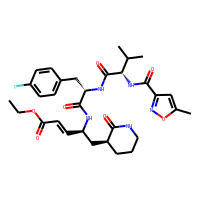
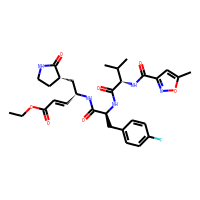
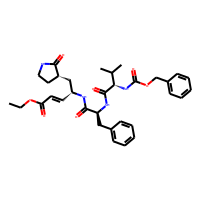
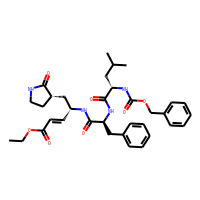
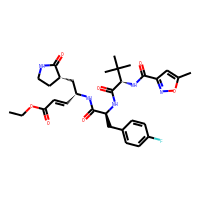

In [47]:
output_df.head()

In [0]:
output_df['logp'] = output_df['ROMol'].map(Descriptors.MolLogP)
output_df['mw'] = output_df['ROMol'].map(Descriptors.MolWt)

,molecule_chembl_id,smiles,ROMol,logp,mw
0,CHEMBL20260,CCOC(=O)/C=C/[C@H](C[C@@H]1CCCNC1=O)NC(=O)[C@H...,,2.12442,613.687
2,CHEMBL20636,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,,1.73432,599.660
3,CHEMBL277716,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,,2.79520,606.720
4,CHEMBL280938,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,,3.18530,620.747
5,CHEMBL21082,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,,2.12442,613.687

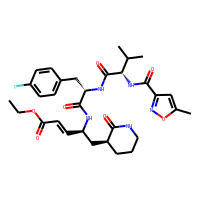
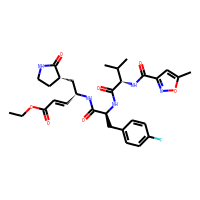
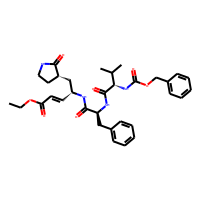
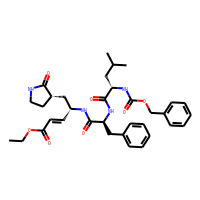
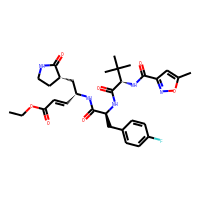

In [49]:
output_df.head()

In [50]:
output_df[['mw', 'logp']].describe()

,mw,logp
count,64.000000,64.000000
mean,596.202891,2.447806
std,58.542471,0.950435
min,403.479000,0.653600
25%,581.423000,1.830320
50%,607.214000,2.599310
75%,626.011500,3.124975
max,715.889000,4.485700


In [0]:
rcParams['figure.figsize'] = 12,12

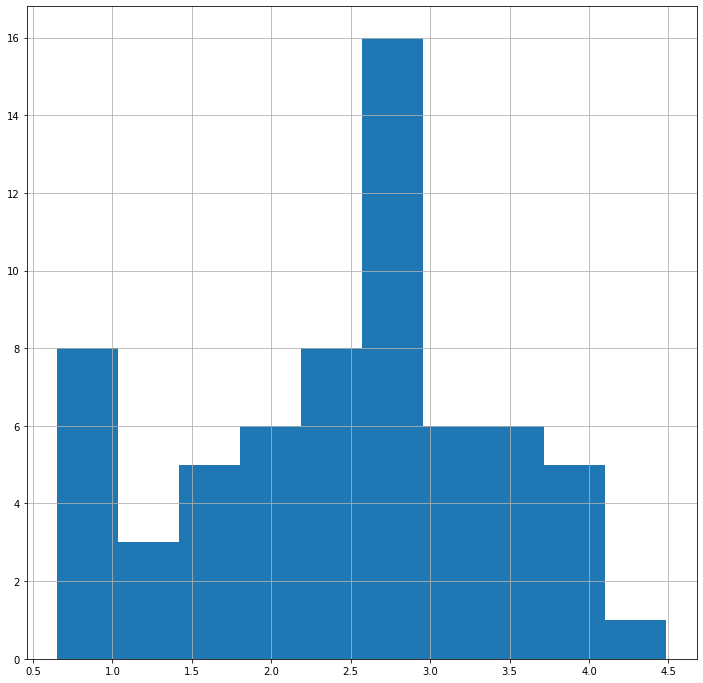

In [52]:
output_df['logp'].hist()

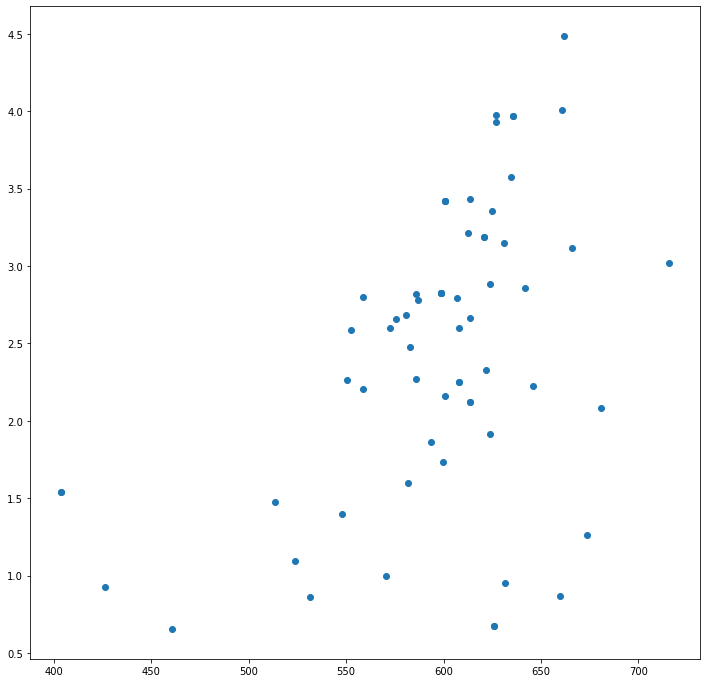

In [53]:
scatter(output_df['mw'],output_df['logp'])